# DFS

## DFS With stack

In [88]:
def dfs_iterative(graph, start):
  # a list to store visited nodes
  visited = []
  # put the initial node in the stack
  stack = [start]

  # repeat until the stack is empty
  while stack:
    # extend the node
    node = stack.pop()
    # check if the node is not visited
    if node not in visited:
      # mark the node as visited
      visited.append(node)
      print(f'Process node: {node}') # or any other process
      # produce nodes
      stack.extend(sorted([n for n in graph[node] if n not in visited], reverse=True))
      print(f'Stack: {stack}, Visited: {visited}\n')

# Define the graph with nodes
graph = {
    0: [1, 2, 3],
    1: [0, 2],
    2: [0, 1, 4],
    3: [0],
    4: [2]
}

dfs_iterative(graph, 0)

Process node: 0
Stack: [3, 2, 1], Visited: [0]

Process node: 1
Stack: [3, 2, 2], Visited: [0, 1]

Process node: 2
Stack: [3, 2, 4], Visited: [0, 1, 2]

Process node: 4
Stack: [3, 2], Visited: [0, 1, 2, 4]

Process node: 3
Stack: [], Visited: [0, 1, 2, 4, 3]



## DFS With Recursively Approach

In [89]:
def dfs_recursive(graph, start, visited=None):
  # a list to store visited nodes
  if visited is None:
      visited = []
  # mark the node as visited
  visited.append(start)

  print(f'Process node: {start}')  # or any other process

  # recursively visit all the unvisited neighbors of the current node
  for neighbor in graph[start]:
    if neighbor not in visited:
      dfs_recursive(graph, neighbor, visited)

# Define the graph with nodes
graph = {
    0: [1, 2, 3],
    1: [0, 2],
    2: [0, 1, 4],
    3: [0],
    4: [2]
}

dfs_recursive(graph, 0)

Process node: 0
Process node: 1
Process node: 2
Process node: 4
Process node: 3


## Applications of DFS

DFS for Search a node

In [90]:
def dfs_search(graph, start, target):
  # a list to store visited nodes
  visited = []
  # put the initial node in the stack
  stack = [start]

  while stack:
  # extend the node
    node = stack.pop()
    # process the node
    if node == target:
      return True
    # check if the node is not visited
    if node not in visited:
      # mark the node as visited
      visited.append(node)
      # produce nodes
      stack.extend(sorted([n for n in graph[node] if n not in visited], reverse=True))
  return False

# Define the graph with nodes
graph = {
    0: [1, 2, 3],
    1: [0, 2],
    2: [0, 1, 4],
    3: [0],
    4: [2]
}

result = dfs_search(graph, 0, 4)
print("Found target:", result)

Found target: True


Check if a given graph is Bipartite

In [91]:
def dfs_bipartite(graph, node, color, colors, visited):
  # color the node
  colors[node] = color
  # mark the node as visited
  visited.append(node)

  for neighbor in graph[node]:
    if neighbor not in visited:
      if not dfs_bipartite(graph, neighbor, 1 - color, colors, visited):  # swap color for the neighbor
        return False
    # if the color doesn't match, the graph is not bipartite
    elif colors[neighbor] == color:
      return False
  return True

def is_bipartite(graph):
  # dictionary to store the colors of nodes
  colors = {}
  # list to store visited nodes
  visited = []
  # recursively visit all the unvisited nodes of the graph
  for node in graph:
    if node not in visited:
      if not dfs_bipartite(graph, node, 0, colors, visited):  # start DFS with color 0
        return False
  return True

# Define the graph with nodes and edges
graph = {
    'A': ['C', 'D', 'E'],
    'B': ['C', 'D', 'E'],
    'C': ['A', 'B'],
    'D': ['A', 'B'],
    'E': ['A', 'B']

}

result = is_bipartite(graph)
print("Is the graph bipartite?", result)

Is the graph bipartite? True


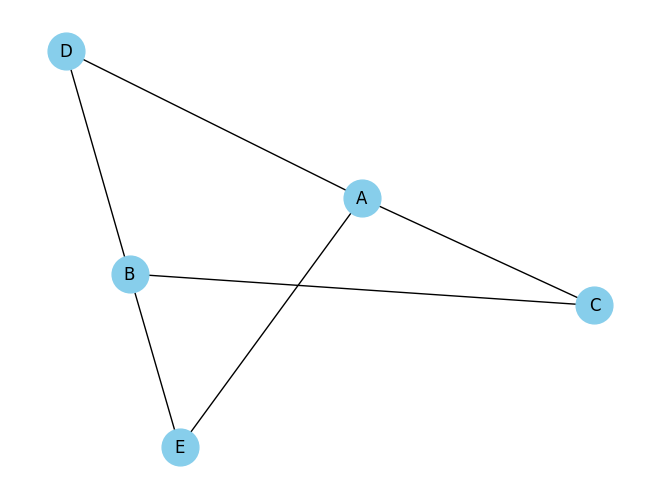

In [92]:
import networkx as nx

G = nx.Graph()

# Add edges to the graph
G.add_edge('A', 'E')
G.add_edge('A', 'C')
G.add_edge('A', 'D')
G.add_edge('B', 'C')
G.add_edge('B', 'E')
G.add_edge('B', 'D')

# Draw the graph
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='black')

Detecting Cycle in a graph

In [93]:
def dfs_cycle_detect(graph, node, visited, parent):
  # Mark the node as visited
  visited.append(node)
  # Traverse neighbors
  for neighbor in graph[node]:
    if neighbor not in visited:
        # Recursively visit the neighbor
        if dfs_cycle_detect(graph, neighbor, visited, node):
          return True
    elif parent is not None and neighbor != parent:
        # If the neighbor is visited and it is not the parent, a cycle is detected
        return True
  return False

def has_cycle(graph):
  # List to keep track of visited nodes
  visited = []
  for node in graph:
    if node not in visited:
        if dfs_cycle_detect(graph, node, visited, None):
            return True
  return False

# Define the graph with nodes and directed edges using lists
graph = {
    'A': ['B'],
    'B': ['C', 'D'],
    'C': ['A'],  # Cycle: A -> B -> C -> A
    'D': [],
}

result = has_cycle(graph)
print("Does the graph have a cycle?", result)

Does the graph have a cycle? True


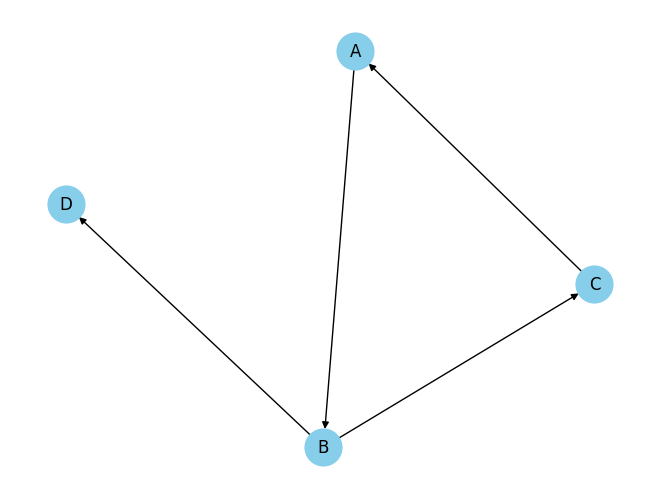

In [94]:
G = nx.DiGraph()

# Add edges to the graph
G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('B', 'D')
G.add_edge('C', 'A')

# Draw the graph
nx.draw(G, with_labels=True, arrows=True, node_color='skyblue', node_size=700, edge_color='black')

Find Strongly Conected Components

In [95]:
def kosaraju_scc(graph):
  def dfs(node, graph, visited, stack=None, component=None):
    # Mark the node as visited
    visited.append(node)
    if component is not None:
      # Collect the node if component is provided
      component.append(node)
    for neighbor in graph[node]:
      if neighbor not in visited:
          dfs(neighbor, graph, visited, stack, component)
    if stack is not None:
      # Add the node to the stack after visiting all neighbors
      stack.append(node)

  def reverse_graph(graph):
    reversed_graph = {node: [] for node in graph}
    for node in graph:
        for neighbor in graph[node]:
            reversed_graph[neighbor].append(node)
    return reversed_graph

  # Step 1: Order nodes by finish time in decreasing order
  stack = []
  visited = []
  for node in graph:
      if node not in visited:
          dfs(node, graph, visited, stack)

  # Step 2: Reverse the graph
  reversed_graph = reverse_graph(graph)

  # Step 3: Process all nodes in decreasing order of finish time
  visited.clear()
  sccs = []
  while stack:
      node = stack.pop()
      if node not in visited:
          component = []
          dfs(node, reversed_graph, visited, component=component)
          sccs.append(component)
  return sccs

# Define the graph with nodes and directed edges
graph = {
    'A': ['B'],
    'B': ['C'],
    'C': ['A', 'D'],
    'D': ['E', 'F'],
    'E': ['G'],
    'F': ['D', 'G'],
    'G': ['E']
}

sccs = kosaraju_scc(graph)
print("Strongly Connected Components:", sccs)

Strongly Connected Components: [['A', 'C', 'B'], ['D', 'F'], ['E', 'G']]


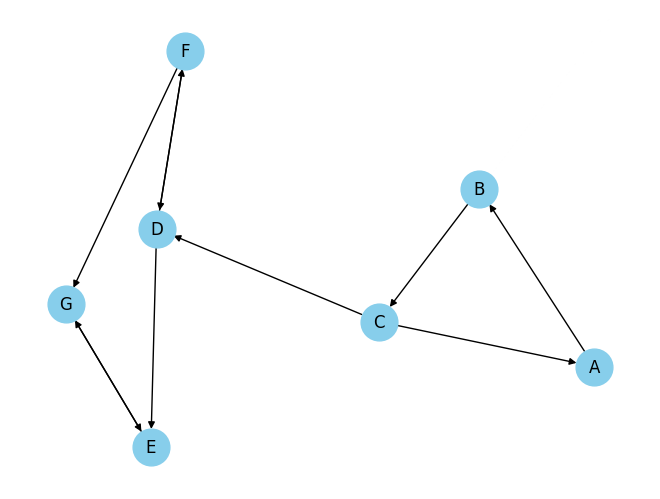

In [113]:
G = nx.DiGraph()

# Add edges to the graph
G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('C', 'A')
G.add_edge('C', 'D')
G.add_edge('D', 'E')
G.add_edge('D', 'F')
G.add_edge('E', 'G')
G.add_edge('F', 'D')
G.add_edge('F', 'G')
G.add_edge('G', 'E')


# Draw the graph
nx.draw(G, with_labels=True, arrows=True, node_color='skyblue', node_size=700, edge_color='black')

Topological Sort

In [97]:
def dfs_recursive(graph, start, visited=None, stack=None):
    # a list to store visited nodes
    if visited is None:
        visited = []
    # mark the node as visited
    visited.append(start)

    # a stack to keep track of the nodes for topological sorting
    if stack is None:
        stack = []

    # recursively visit all the neighbors of the current node, if the node is unvisited
    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs_recursive(graph, neighbor, visited, stack)

    # add the node to the stack after visiting neighbors
    stack.append(start)

def topological_sort_dfs(graph):
    visited = []  # a list to mark nodes as visited
    stack = []  # a stack to store the topological order

    # perform DFS algorithm for each node in the graph
    for node in graph:
        if node not in visited:
            dfs_recursive(graph, node, visited, stack)
    # return the stack in reverse order for topological sorting
    return stack[::-1]

# Define the graph with nodes
graph = {
    'A': ['C', 'D'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': ['F'],
    'E': ['F'],
    'F': []
}

topological_order = topological_sort_dfs(graph)
print("Topological Order:", topological_order)

Topological Order: ['B', 'E', 'A', 'D', 'C', 'F']


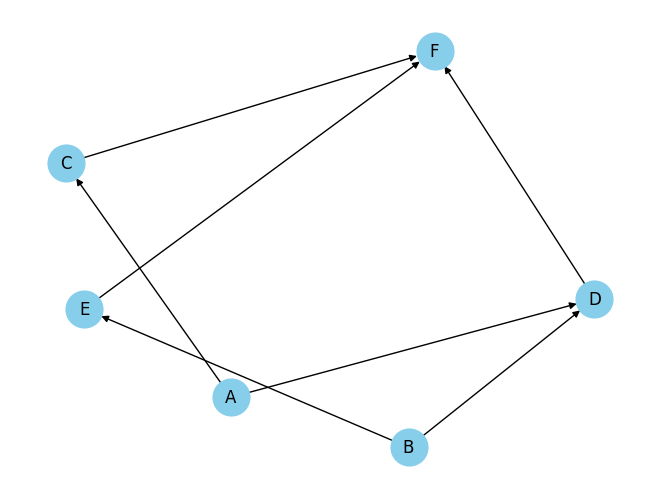

In [98]:
G = nx.DiGraph()

# Add edges to the graph
G.add_edge('A', 'C')
G.add_edge('A', 'D')
G.add_edge('B', 'D')
G.add_edge('B', 'E')
G.add_edge('C', 'F')
G.add_edge('D', 'F')
G.add_edge('E', 'F')


# Draw the graph
nx.draw(G, with_labels=True, arrows=True, node_color='skyblue', node_size=700, edge_color='black')

# BFS

In [99]:
from collections import deque

## BFS With Queue

In [100]:
def bfs_iterative(graph, start):
  # a list to store visited nodes
  visited = []
  # put the initial node in the queue
  queue = deque([start])

  # repeat until the queue is empty
  while queue:
    # dequeue the first node from the queue
    node = queue.popleft()
    # check if the node is not visited
    if node not in visited:
      # mark the node as visited
      visited.append(node)
      print(f'Process node: {node}')  # or any other process
      # enqueue all unvisited neighbors
      queue.extend([n for n in graph[node] if n not in visited])
      print(f'Queue: {list(queue)}, Visited: {visited}\n')

# Define the graph with nodes
graph = {
    0: [1, 2, 3],
    1: [0, 2],
    2: [0, 1, 4],
    3: [0],
    4: [2]
}

bfs_iterative(graph, 0)

Process node: 0
Queue: [1, 2, 3], Visited: [0]

Process node: 1
Queue: [2, 3, 2], Visited: [0, 1]

Process node: 2
Queue: [3, 2, 4], Visited: [0, 1, 2]

Process node: 3
Queue: [2, 4], Visited: [0, 1, 2, 3]

Process node: 4
Queue: [], Visited: [0, 1, 2, 3, 4]



## BFS With Recursively Approach

In [101]:
def bfs_recursive(graph, queue, visited):
    # if the queue is empty, return
    if not queue:
        return

    # dequeue the first node from the queue
    node = queue.popleft()
    # check if the node is not visited
    if node not in visited:
        # mark the node as visited
        visited.append(node)
        print(f'Process node: {node}')  # or any other process
        # enqueue all unvisited neighbors
        for neighbor in graph[node]:
            if neighbor not in visited:
                queue.append(neighbor)
        print(f'Queue: {list(queue)}, Visited: {visited}\n')

    # recursively call bfs_recursive with updated queue and visited list
    bfs_recursive(graph, queue, visited)

# Define the graph with nodes
graph = {
    0: [1, 2, 3],
    1: [0, 2],
    2: [0, 1, 4],
    3: [0],
    4: [2]
}

bfs_recursive(graph, deque([0]), [])

Process node: 0
Queue: [1, 2, 3], Visited: [0]

Process node: 1
Queue: [2, 3, 2], Visited: [0, 1]

Process node: 2
Queue: [3, 2, 4], Visited: [0, 1, 2]

Process node: 3
Queue: [2, 4], Visited: [0, 1, 2, 3]

Process node: 4
Queue: [], Visited: [0, 1, 2, 3, 4]



##  Applications of BFS

BFS for Search a node

In [102]:
def bfs_search(graph, start, target):
  # a list to store visited nodes
  visited = []
  # put the initial node in the queue
  queue = deque([start])

  # repeat until the queue is empty
  while queue:
    # dequeue the first node from the queue
    node = queue.popleft()
    # process the node
    if node == target:
      return True
    # check if the node is not visited
    if node not in visited:
      # mark the node as visited
      visited.append(node)
      # enqueue all unvisited neighbors
      queue.extend([n for n in graph[node] if n not in visited])
  return False

# Define the graph with nodes
graph = {
    0: [1, 2, 3],
    1: [0, 2],
    2: [0, 1, 4],
    3: [0],
    4: [2]
}

# Call the function to search for the target node
result = bfs_search(graph, 0, 4)
print("Found target:", result)

Found target: True


Find Shortest path in an unweighted graph

In [103]:
def bfs_shortest_path(graph, start, target):
  # a list to store visited nodes
  visited = []
  # put the initial node in the queue and the path taken to reach it
  queue = deque([(start, [start])])

  while queue:
    # dequeue a node and the path taken to reach it
    node, path = queue.popleft()

    # If the target node is found, return the path
    if node == target:
      return path

    # If the node has not been visited, mark it as visited
    if node not in visited:
      visited.append(node)

      # Enqueue all adjacent nodes that have not been visited
      for neighbor in graph[node]:
        if neighbor not in visited:
          queue.append((neighbor, path + [neighbor]))

  return []

# Define the graph with nodes and edges
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['A', 'C'],
    'C': ['A', 'B', 'E'],
    'D': ['A'],
    'E': ['C']
}

# Find the shortest path from node 0 to node 4
shortest_path = bfs_shortest_path(graph, 'A', 'E')
print("Shortest path from A to E:", shortest_path)

Shortest path from A to E: ['A', 'C', 'E']


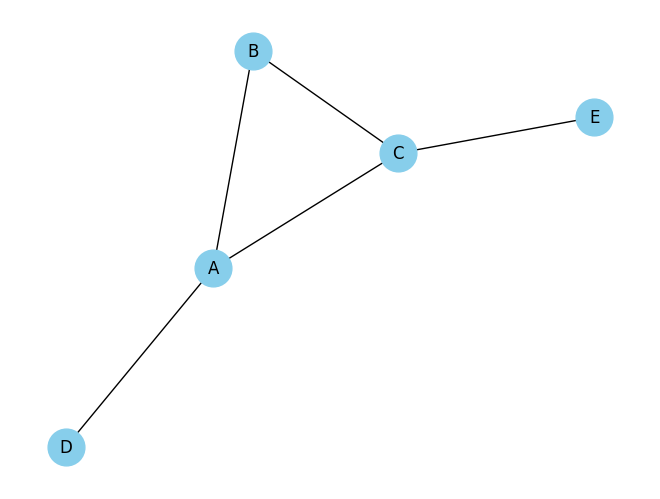

In [104]:
G = nx.Graph()

# Add edges to the graph
G.add_edge('A', 'B')
G.add_edge('A', 'C')
G.add_edge('A', 'D')
G.add_edge('B', 'C')
G.add_edge('C', 'E')
G.add_edge('E', 'C')


# Draw the graph
nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='black')

Check if a given graph is Bipartite

In [105]:
def bfs_bipartite(graph, start, colors, visited):
  # put the initial node in the queue with color 0
  queue = deque([(start, 0)])

  while queue:
    node, color = queue.popleft()
    if node in colors:
      # if the node is already colored and the color doesn't match, return False
      if colors[node] != color:
        return False
      else:
          # color the node
          colors[node] = color
          # mark the node as visited
          visited.append(node)
          # enqueue all unvisited neighbors with the opposite color
          for neighbor in graph[node]:
            if neighbor not in visited:
              queue.append((neighbor, 1 - color))
  return True

def is_bipartite(graph):
  # dictionary to store the colors of nodes
  colors = {}
  # list to store visited nodes
  visited = []
  # iteratively visit all the unvisited nodes of the graph
  for node in graph:
    if node not in visited:
      if not bfs_bipartite(graph, node, colors, visited):  # start BFS with color 0
        return False
  return True

# Define the graph with nodes and edges
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'D'],
    'D': ['B', 'C']
}

result = is_bipartite(graph)
print("Is the graph bipartite?", result)

Is the graph bipartite? True


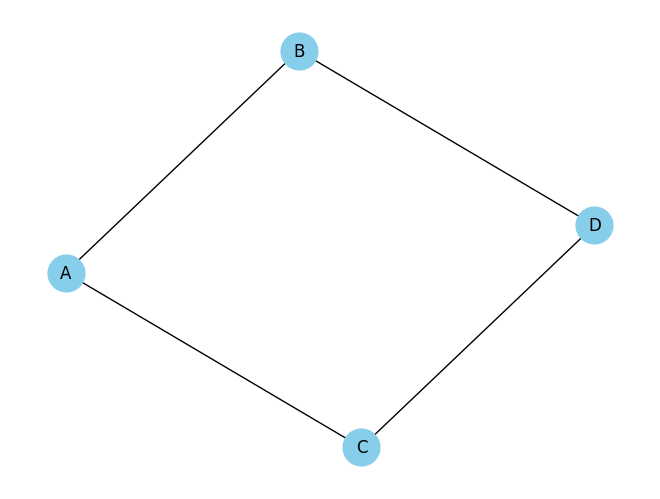

In [106]:
G = nx.Graph()

# Add edges to the graph
G.add_edge('A', 'B')
G.add_edge('A', 'C')
G.add_edge('B', 'D')
G.add_edge('C', 'D')

# Draw the graph
nx.draw(G, with_labels=True, arrows=True, node_color='skyblue', node_size=700, edge_color='black')